In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("Crop_Recommendation.csv")


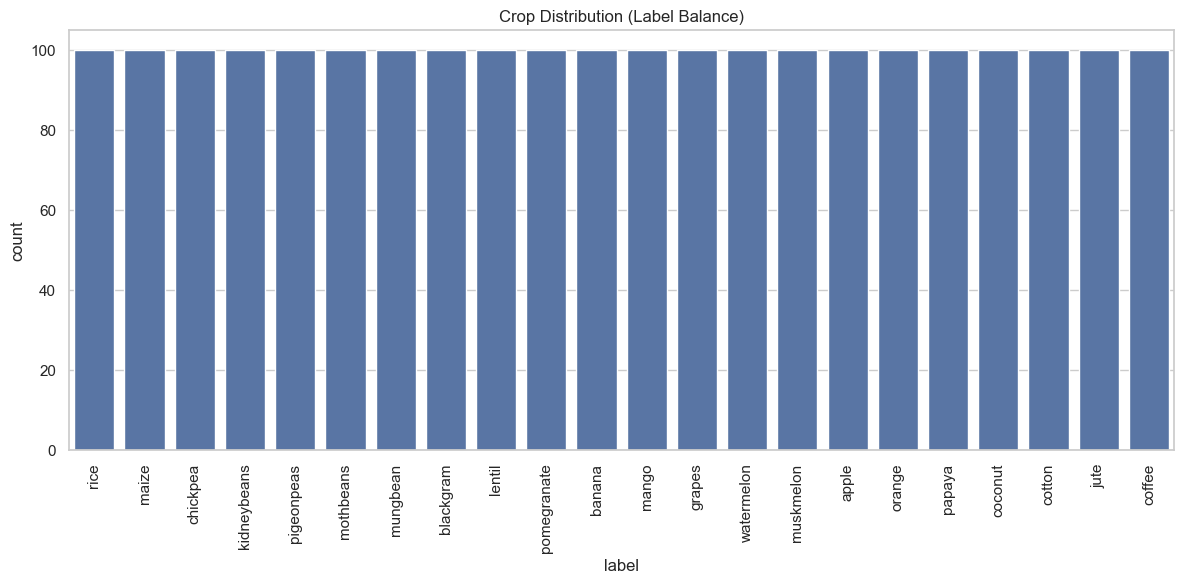

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution (Label Balance)")
plt.tight_layout()
plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

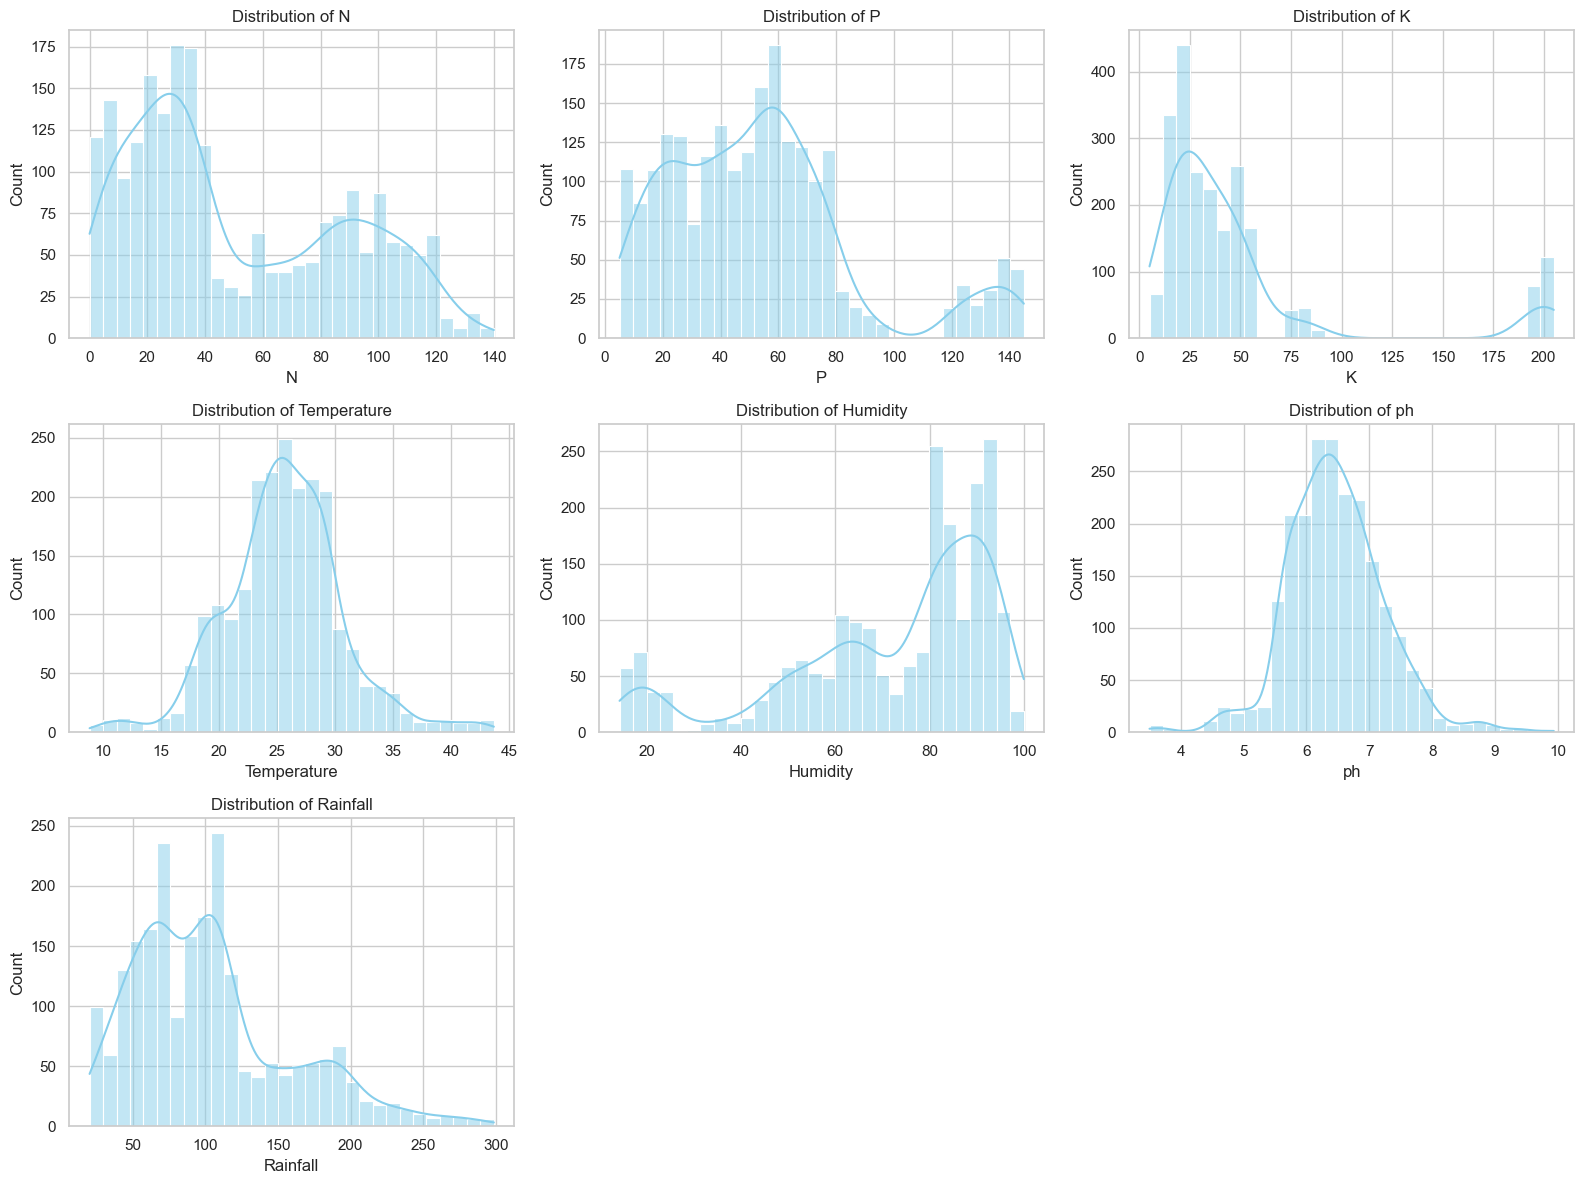

In [ ]:
plt.figure(figsize=(16, 12))
features = ['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall']
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig("feature_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

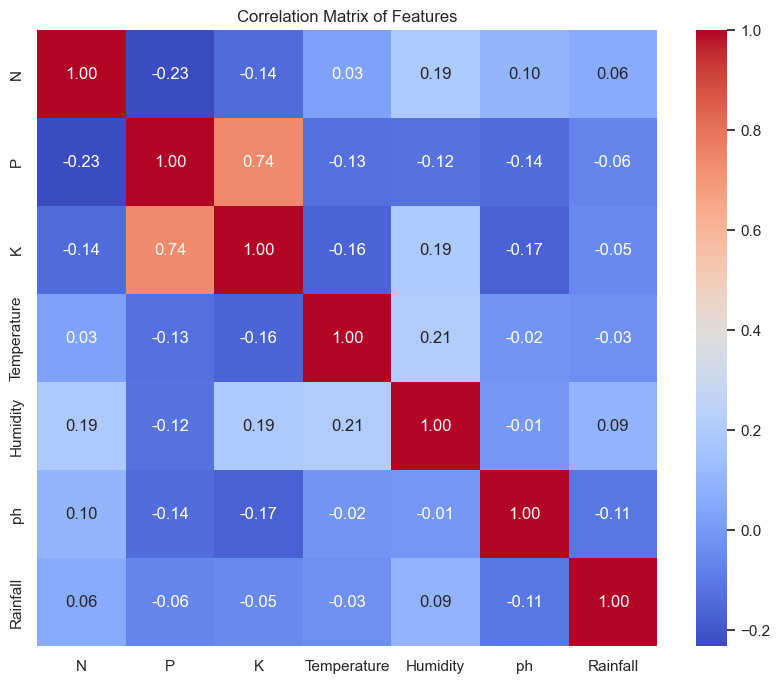

In [ ]:
plt.figure(figsize=(10, 8))
features = ['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall']
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

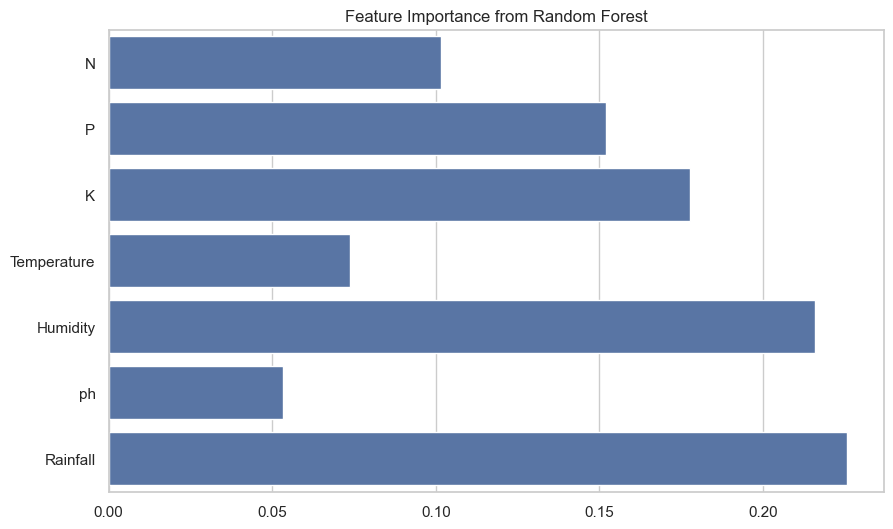

In [ ]:
# Encode the target labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train a simple Random Forest
features = ['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall']
X = df[features]
y = df['label_encoded']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

